In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
file = open("hawaii.sqlite", 'w', encoding='utf-8')

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
session.query(func.max(Measurement. date)).all()

[('2017-08-23',)]

In [12]:
dt.date(2017,8,23)

datetime.date(2017, 8, 23)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
first_date = dt.date(2017,8,23)-dt.timedelta(days=365)
first_date

datetime.date(2016, 8, 23)

In [14]:
# Perform a query to retrieve the data and precipitation scores
prcp_result=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()
prcp_result

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_result)
prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [16]:
# Sort the dataframe by date
prcp_df.sort_values('date', inplace=True )

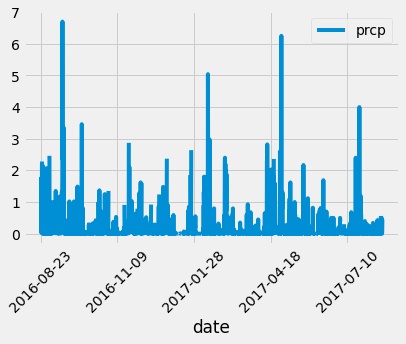

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x ='date',y ='prcp', rot=45)
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [22]:
first_date = dt.date(2015,9,10)-dt.timedelta(days=365)
first_date

datetime.date(2014, 9, 10)

In [23]:
tobs_result=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= first_date).\
            filter(Measurement.date <= dt.date(2015,9,10))
tobs_result

In [24]:
most_act_station_tobs_df = pd.DataFrame(tobs_result)
most_act_station_tobs_df

,date,tobs
0,2014-09-10,79.0
1,2014-09-11,79.0
2,2014-09-12,78.0
3,2014-09-13,80.0
4,2014-09-14,73.0
...,...,...
2466,2015-09-06,74.0
2467,2015-09-07,76.0
2468,2015-09-08,79.0
2469,2015-09-09,78.0


In [25]:
most_act_station_tobs_df.sort_values('date', inplace=True )

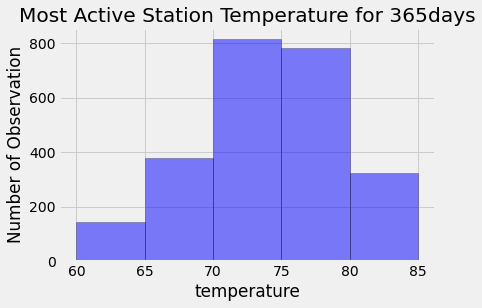

In [26]:
bin_edges = [60,65,70,75,80,85]

plt.hist(most_act_station_tobs_df.tobs,
         bins=bin_edges,
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5)

plt.xlabel('temperature')
plt.xticks([60,65,70,75,80,85])
plt.ylabel('Number of Observation')
plt.title('Most Active Station Temperature for 365days')

plt.show()

# Close session

In [134]:
# Close Session
session.close()

In [135]:
app = Flask(__name__)

In [136]:
@app.route("/")
def home():
    """List all available api rountes"""
    return (
        f"Available Route:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs"
  )

In [137]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    session = Session(engine)

    """Convert quert results to a dictionary using date as the key and prcp as the value"""
    """Return the JSON representation of your dictionary"""
    
    prcp_results = session.query(Measurement.date, func.avg(Measurement.prcp)).filter(Measurement.date >= last_twelve_months).group_by(Measurement.date).all()
    return jsonify(prcp_results)

In [138]:
@app.route("/api/v1.0/stations")
def stations():
    session = Session(engine)


    station_results = session.query(Measurement.station).all()
    return jsonify(station_results)

In [139]:
@app.route("/api/v1.0/tobs")
def tobs():

    """Query the dates and temperature observations of the most active station for the previous year of data"""
    """Return a JSON list of Temperature Observations (TOBS) for the previous year"""

    tobs_results = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= last_twelve_months).all()
    return jsonify(tobs_results)

In [140]:
@app.route("/api/v1.0/<date>")
def startDateOnly(date):
    day_temp_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= date).all()
    return jsonify(day_temp_results)

In [141]:
@app.route("/api/v1.0/<start>/<end>")
def startDateEndDate(start,end):
    multi_day_temp_results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    return jsonify(multi_day_temp_results)

In [118]:
if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/traitlets/config/application.py", line 88, in inner
    return method(app, *args, **kwargs)
  File "/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 632, in initialize
    self.init_sockets()
  File "/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 282, in init_sockets
    self.shell_port = self._bind_socket(self.shell_socket, sel

SystemExit: 1

/Users/hyeeunnoh/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
